In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement de la base de données contenant les infos + performances des joueurs

df = pd.read_csv('./data/merged_data.csv')

print(f"Dataset chargé: {len(df)} lignes, {len(df.columns)} colonnes")

Dataset chargé: 10285 lignes, 78 colonnes


# 1 - Statistiques Descriptives
## Données utilisées

Nous avons construit la base de données "NBA_Stats"

Elle présente de nombreuses variables d’intérêt pour notre étude :  
  
**adjusted_salary :** *Salaire brut sur une saison, ajusté pour permettre la comparaison entre les différentes saisons*  
**PTS :** *Nombre de points inscrits par match en moyenne sur une saison régulière de 82 matchs*  
**REB :** *Nombre de rebonds captés par match en moyenne sur une saison régulière de 82 matchs*  
**AST :** *Nombre de passes décisives effectuées par match en moyenne sur une saison régulière de 82 matchs*  
**STL :** *Nombre d'interceptions effectuées par match en moyenne sur une saison régulière de 82 matchs*  
**BLK :** *Nombre de tirs contrés par match en moyenne sur une saison régulière de 82 matchs*  
**PLUS_MINUS :** *Différence entre les points inscrits et encaissés par l'équipe lorsque le joueur est présent sur le terrain, en moyenne sur une saison régulière de 82 matchs*  
**NBA_FANTASY_PTS :** *Points attribués aux performances des joueurs, sur une plateforme permettant de faire un concours de pronostic durant la saison*  
  
**XXX_RANK :** *Classement d'un joueur sur une saison régulière dans la catégorie statistique XXX (PTS, REB, AST, STL, BLK)*  

**YOE :** *Nombre d'années passées à jouer dans la ligue (Ancienneté)* 

Les salaires des joueurs reposent-ils uniquement sur leur performances sur le terrain? 
Regardons l'évolution des 5 statistiques principalement regardées (par le grand public) en NBA, ainsi que le temps de jeu.

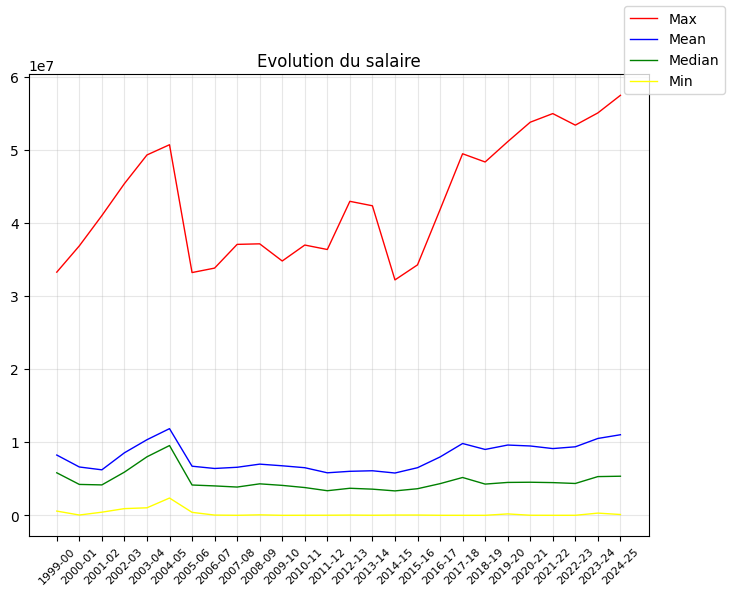

In [5]:
from plot_func import plot_stat

fig, axes = plt.subplots(1,1, figsize=(8, 6))

plot_stat('adjusted_salary', axes , df)
axes.set_title(f'Evolution du salaire')

fig.legend()
plt.show()

### Evolution des 5 statistiques majeures (PTS, REB, AST, STL, BLK)

In [6]:
df['total_minutes'] =  df['MIN'] * df['GP']
time_played_season = df.groupby('Season')['total_minutes']    # Nombre de minutes jouées par saison en moyenne

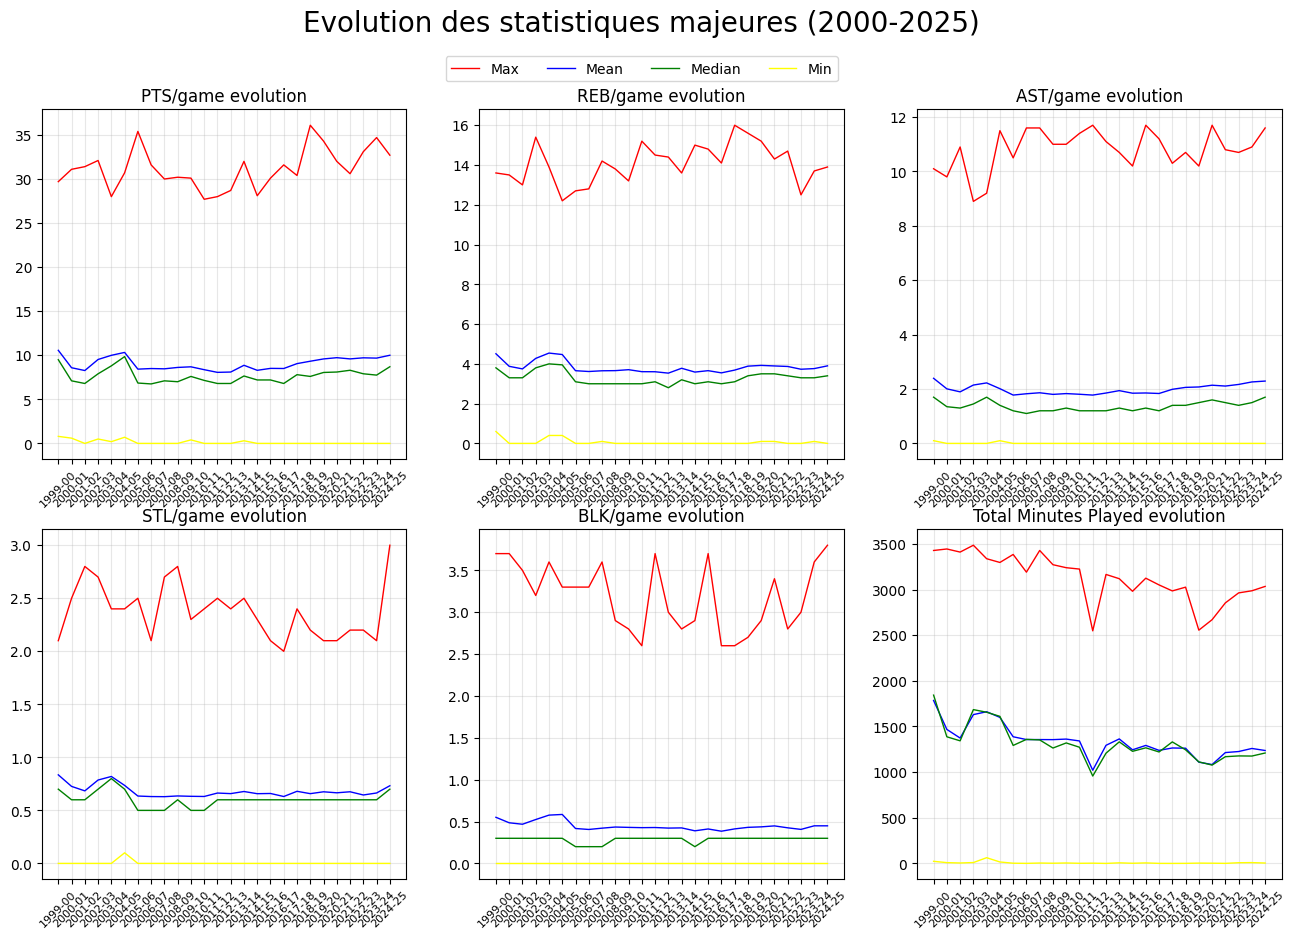

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Evolution des statistiques majeures (2000-2025)', fontsize=20)
labels = []
labels.extend(['Max', 'Mean', 'Median', 'Min'])
plot_stat('PTS', axes[0,0])


plot_stat('REB', axes[0,1])
plot_stat('AST', axes[0,2])
plot_stat('STL', axes[1,0])
plot_stat('BLK', axes[1,1])
plot_stat('total_minutes', axes[1,2] , df)
axes[1,2].set_title(f'Total Minutes Played evolution')

fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=4)
plt.show()

On n'observe pas d'augmentation massive d'aucune des 5 statistiques principales qui semble pouvoir totalement expliqué la hausse des salaires. On peut aussi penser que les joueurs jouent plus et que c'est pour cela qu'ils sont mieux payés qu'avant. Mais la encore aucune évolution notable du temps de jeu, il semble même plutôt diminuer.  
La diminution soudaine des minutes totales jouées en 2011-2012, s'explique par le lockout (~ grève des joueurs),du 1er juillet au 8 décembre 2011, qui a amputé cette saison de ses 16 premiers matchs.

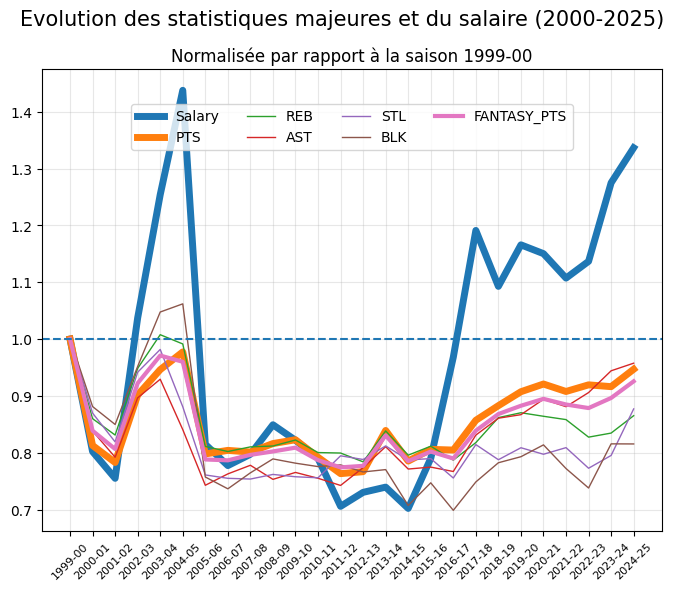

In [10]:
from plot_func import stat_norm

plt.figure(figsize=(8, 6))
plt.suptitle('Evolution des statistiques majeures et du salaire (2000-2025)', fontsize=15)

plt.plot(stat_norm('adjusted_salary'),linewidth = 5, label= 'Salary')
plt.plot(stat_norm('PTS'),linewidth = 5, label= 'PTS')

plt.plot(stat_norm('REB'),linewidth = 1, label= 'REB')
plt.plot(stat_norm('AST'),linewidth = 1, label= 'AST')
plt.plot(stat_norm('STL'),linewidth = 1, label= 'STL')
plt.plot(stat_norm('BLK'),linewidth = 1, label= 'BLK')

plt.plot(stat_norm('NBA_FANTASY_PTS'),linewidth = 3, label= 'FANTASY_PTS')
plt.axhline(y=1,linestyle = '--')

plt.grid(True, alpha=0.3)
plt.title("Normalisée par rapport à la saison 1999-00")
plt.legend( loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=4)
plt.tick_params(axis='x', rotation=45, labelsize='8')
plt.show()

ATTENTION : Le boom des salaires et des performances autour de 2004 provient probablement d'un problème de données, en effet on possède un nombre faible de joueurs pour les saisons de 2002-03 à 2004-05, on peut rationnellement penser que les informations disponibles concernent les meilleurs joueurs, donc ceux qui font les meilleures performances et qui sont le mieux payés.
Hormis cette "explosion", le salaire comme les performances moyennes restent à peu près stable du début des années 2000 à 2015.
A partir de 2016 on observe une augmentaion du salaire moyen et des performances moyennes mais proportionnelement moins importante que l'augmentation du salaire. On observe aussi une augmentation des performances mais à une échelle plus réduite. 

### Evolution des salaires en fonctions des performances

In [11]:
from plot_func import plot_desc_salary_cont
from plot_func import plot_desc_salary

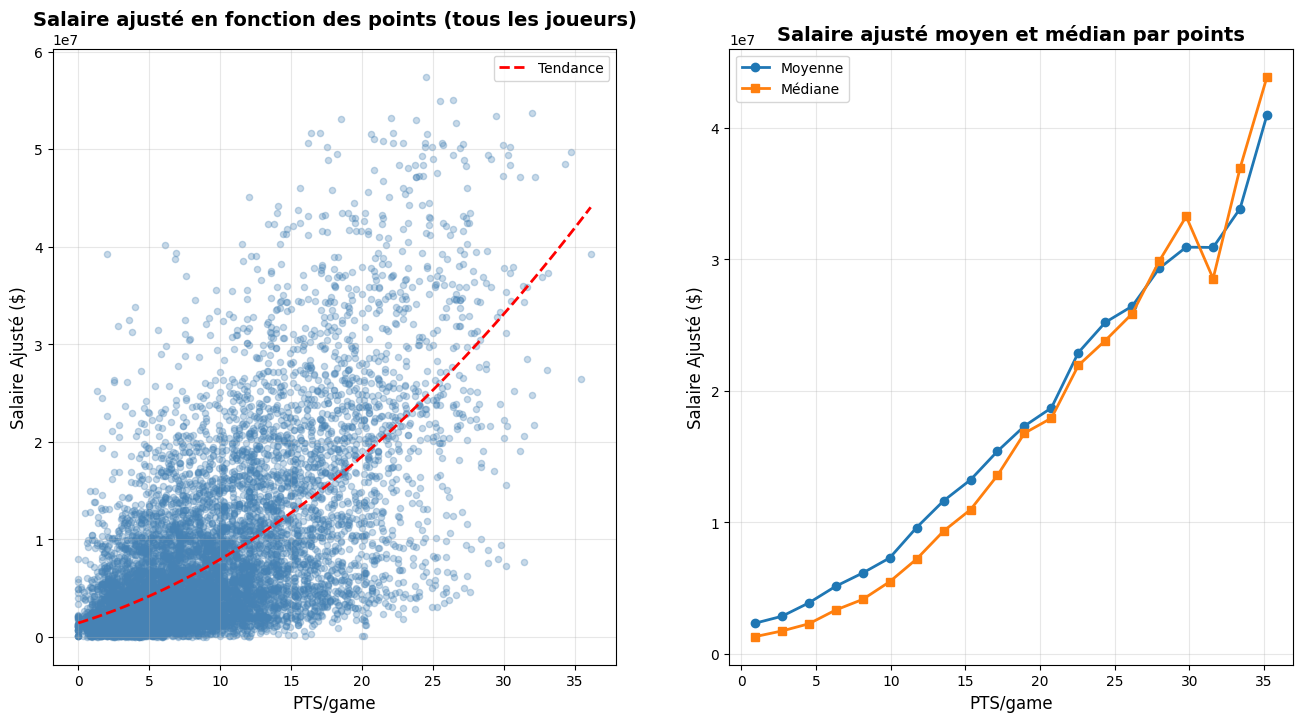

In [13]:
plot_desc_salary_cont('PTS' , 'points' , nb_inter = 20)

Comme notre intuition laissait à penser, les salaires évoluent positivement en fonction des points inscrits. Cette évolution n'est pas constante, en passant la barre des 25 points par match, les salaires évoluent encore plus fortement pour chaque points supplémentaires inscrits par match. Le graphique de droite semble montrer qu'inscire un 31eme points par match a un effet négatif sur le salaire médian, ce qui ne semble pas cohérent, mais qui peut être expliqué par le faible nombre de joueurs à plus de 30 points par match.  

Cependant le nuage de points présente une dispersion importante, alors malgré une tendance claire, estimer le salaire d'un joueur uniquement à partir des points inscrits semble impossible.  

On cherche alors une variable qui tienne compte de plus de paramètres que simplement les points inscrits. On utilise alors un proxy de la performance globale : NBA_FANTASY_PTS. Cette variable attribue des "fantasy points" à chaque action positive effectué par un joueur (dans la version actuelle): 1 pour chaque point (réels) inscrit, 1 pour chaque rebond, 2 par passe décisive, 3 par contre et enfin 3 par interception

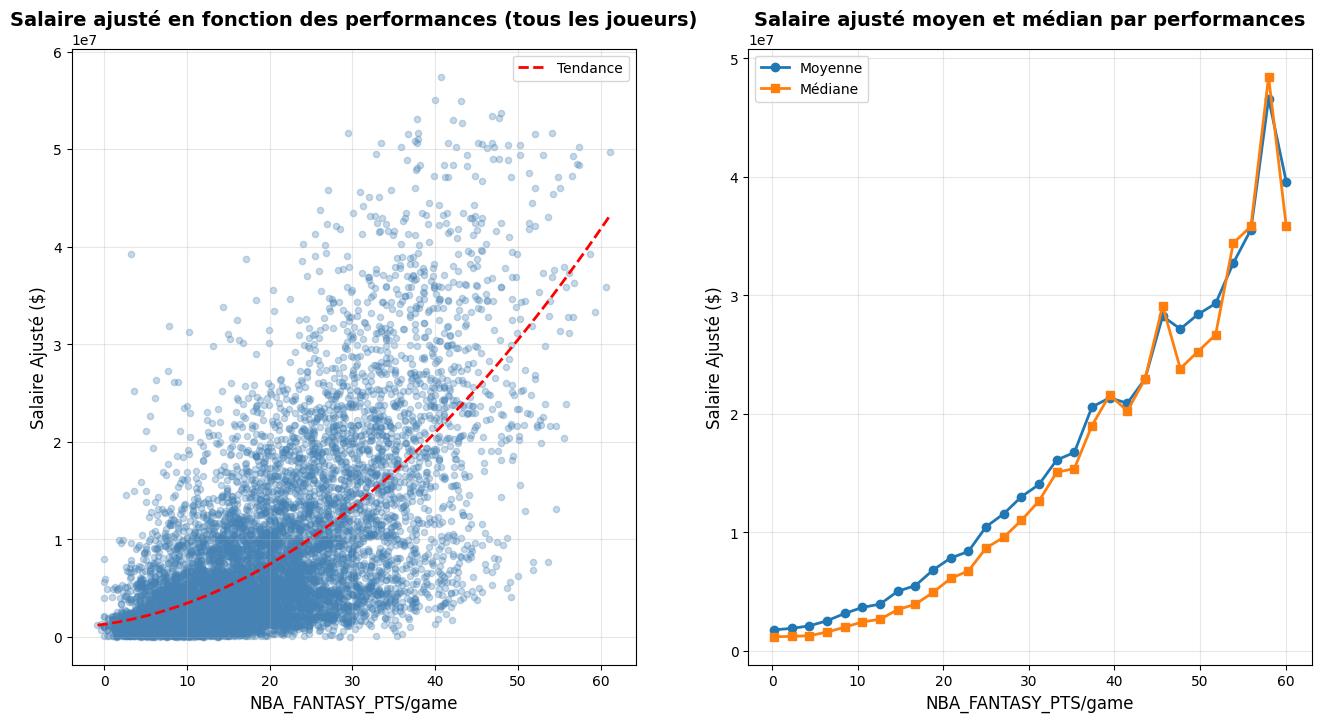

In [19]:
plot_desc_salary_cont('NBA_FANTASY_PTS' , 'performances', nb_inter = 30)

### Evolution des performances en fonction de l'exprérience

Dans la grande majorité des domaines on observe une corrélation entre expérience et rémunération, car on apprends le métier au cours des années et on devient alors plus performants. Cela ne semble pas aussi simple dans le sport de haut niveau, car le corps fatigue avec les années. 

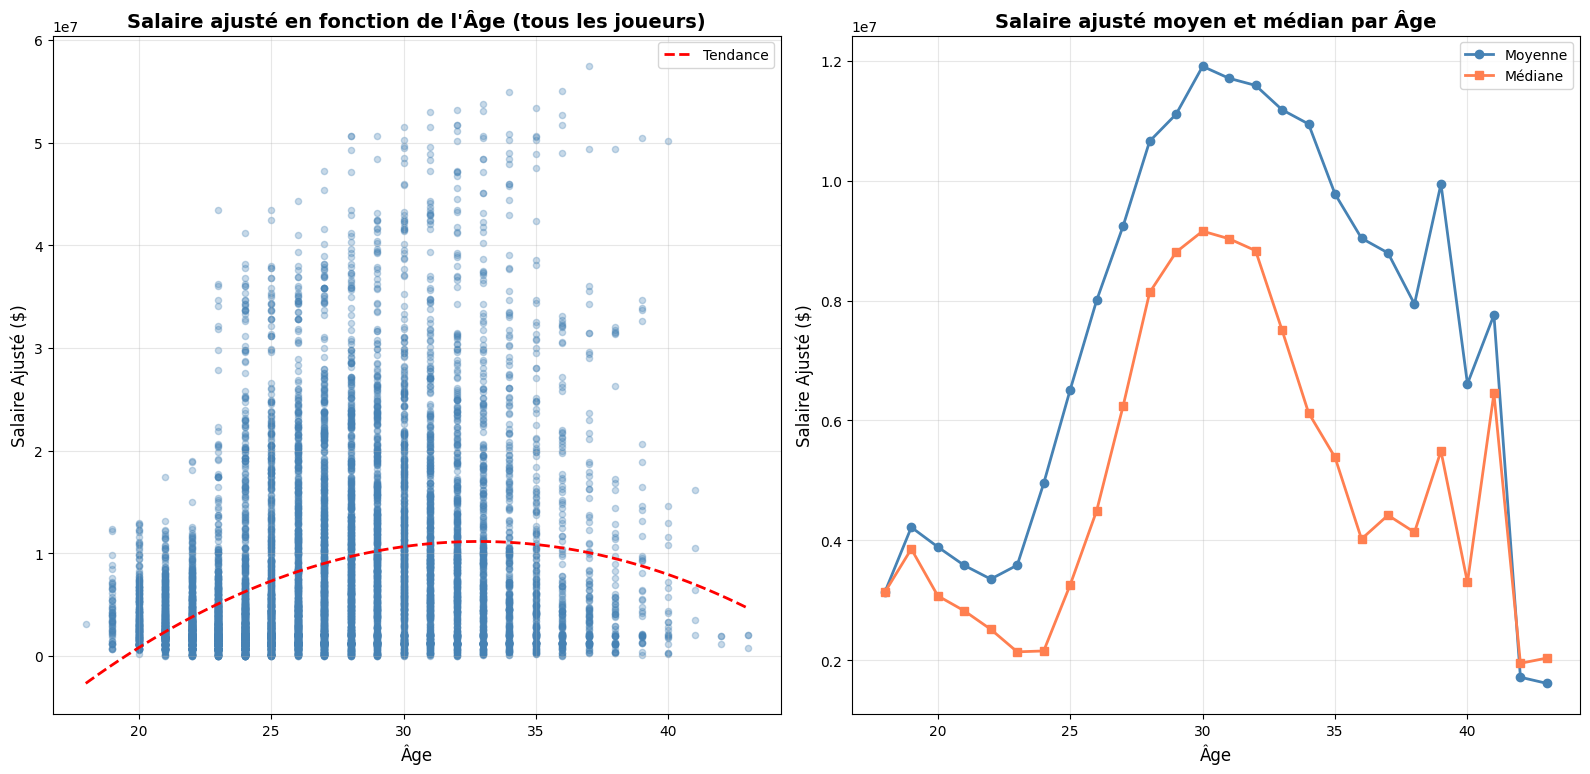

In [15]:
plot_desc_salary('AGE' , 'Âge')

On observe que les salaires moyens et médians sont maximaux à 30 ans. On pourrait s'attendre plutôt à atteindre ce pic un peu plus tôt dans la carrière d'un joueur, qui devrait commencer à décliner vers cet âge, cependant on a probablement un biais de sélection dans notre cas. En effet si un joueur est encore présent à 30 ans dans la ligue c'est certainement qu'il est performant, sinon il aurait déjà été congédié au cours des années précédentes. Ainsi, puisqu'il reste les excellent joueurs, extrêmement payés, les salaires sont tirés vers le haut. L'augmentation de la différence entre salaire moyen et médian passé 30 ans (Graph. 2) confirme ce point de vue. 

La variance forte des salaires pour les plus vieux joueurs (passé 35 ans) s'explique par la présence de 2 profils : les meilleurs joueurs qui continuent et sont grassement payés, et les vétérans payés faiblement pour donner des conseils aux jeunes plutôt que pour vraiment beaucoup jouer.  

D'autre par les salaires plus élevés pour les très jeunes (18-19ans) que pour les jeunes (~22ans), traduit d'un autre biais de sélection, en effet les seuls joueurs aussi jeunes à se présenter à la Draft (Choix des nouveaux joueurs dans la ligue) et à être sélectionnés sont souvent des talents générationnels qui ne passent pas ou peu par l'université (par exemple, LeBron James, Kobe Bryant ou plus récemment Victor Wembanyama et Cooper Flag).  

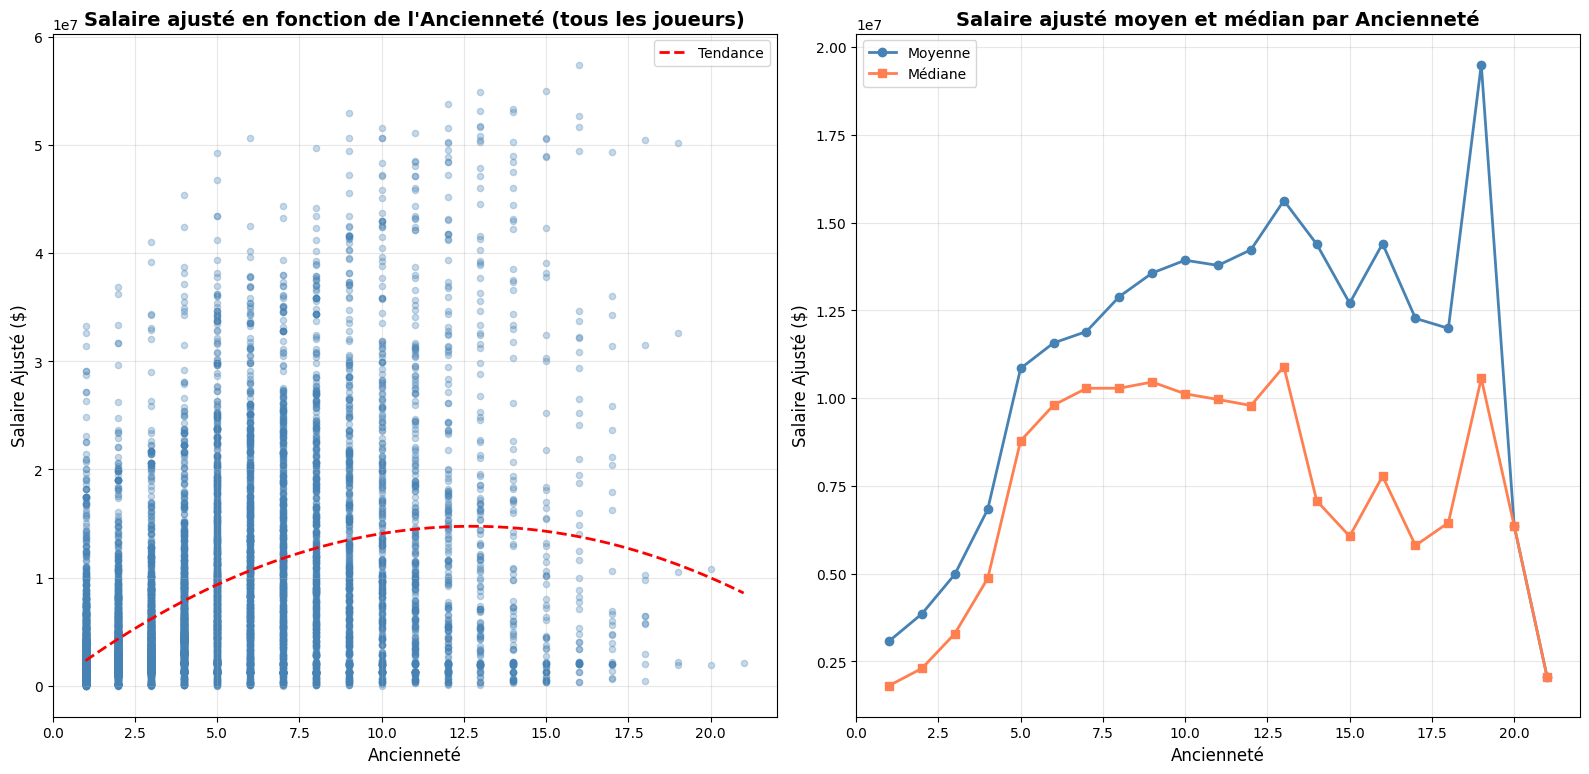

In [26]:
plot_desc_salary('YOE' , 'Ancienneté')

Pour ne tenir compte que de l'expérience, sans différencier l'age d'arrivée dans la ligue, on utilise la variable YOE (nombre d'années dans la ligue) qui indique l'ancienneté. On trouve des représentations similaires aux graphiques précédents, sans le problème concernant les plus jeunes.

### Salaire par poste occupé

La valeur des joueurs varie-t-elle de manière importante selon la position à laquelle ils évoluent ?  
Pour faire le parallèle avec d'autres sport, ils sembleraient que ce soit le cas au football ou au rugby. Les buteurs au football, peut-être car inscrire des buts est plus souvent mis en avant que défendre, et les demi-d'ouverture (10) peut-être car il occupe un poste très différents des autres, sont en moyennes mieux payés que les autres. Mais est-ce aussi le cas en NBA, où tous les joueurs jouent des 2 cotés du terrain? 

/tmp/ipykernel_3575/569990177.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




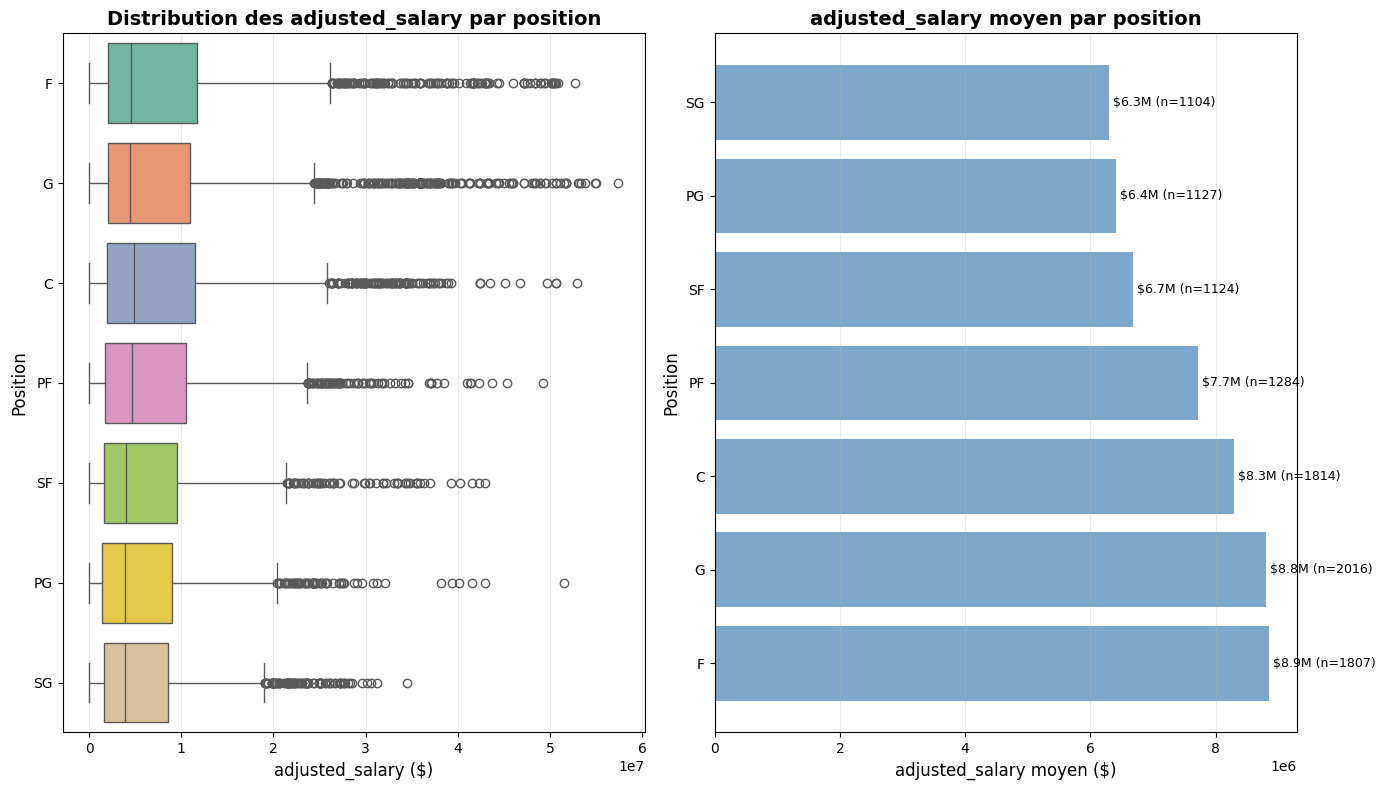


Résumé des salaires par position:
Position  mean_millions  median_millions  count
       F       8.853508         4.566910   1807
       G       8.806932         4.421021   2016
       C       8.300395         4.867920   1814
      PF       7.721727         4.649940   1284
      SF       6.674962         3.963011   1124
      PG       6.406908         3.878577   1127
      SG       6.303262         3.877799   1104


In [23]:
# Graphique du salaire moyen par position
plt.figure(figsize=(14, 8))

# Vérifier si la colonne Position existe
if 'Position' in df.columns:
    # Filtrer les données avec salaire non nul et exclure la position 'GF'
    df_with_salary = df[(df['adjusted_salary'].notna()) & 
                                 (df['adjusted_salary'] > 0) & 
                                 (df['Position'] != 'GF')]
    
    # Calculer le salaire moyen par position
    salary_by_position = df_with_salary.groupby('Position')['adjusted_salary'].agg(['mean', 'median', 'count']).reset_index()
    salary_by_position = salary_by_position.sort_values('mean', ascending=False)
    
    # Créer un boxplot pour montrer la distribution
    plt.subplot(1, 2, 1)
    positions_order = salary_by_position['Position'].tolist()
    sns.boxplot(data=df_with_salary, y='Position', x='adjusted_salary', order=positions_order, palette='Set2')
    plt.title('Distribution des adjusted_salary par position', fontsize=14, fontweight='bold')
    plt.xlabel('adjusted_salary ($)', fontsize=12)
    plt.ylabel('Position', fontsize=12)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Créer un graphique en barres pour le salaire moyen
    plt.subplot(1, 2, 2)
    bars = plt.barh(salary_by_position['Position'], salary_by_position['mean'], color='steelblue', alpha=0.7)
    plt.title('adjusted_salary moyen par position', fontsize=14, fontweight='bold')
    plt.xlabel('adjusted_salary moyen ($)', fontsize=12)
    plt.ylabel('Position', fontsize=12)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Ajouter les valeurs sur les barres
    for i, (pos, val, count) in enumerate(zip(salary_by_position['Position'], 
                                                salary_by_position['mean'], 
                                                salary_by_position['count'])):
        plt.text(val, i, f' ${val/1e6:.1f}M (n={count})', 
                va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Afficher le tableau récapitulatif
    print("\nRésumé des salaires par position:")
    print("="*80)
    salary_by_position['mean_millions'] = salary_by_position['mean'] / 1e6
    salary_by_position['median_millions'] = salary_by_position['median'] / 1e6
    print(salary_by_position[['Position', 'mean_millions', 'median_millions', 'count']].to_string(index=False))
    
else:
    print("La colonne 'Position' n'existe pas dans le dataset.")
    print(f"Colonnes disponibles: {df.columns.tolist()}")

PG = Meneur , SG = Arrière , G = Meneur et Arrière  
SF = Ailier , PF = Ailier Fort , F = Ailier et Ailier Fort  
C = Pivot

Il ne semble pas y avoir de différences une fois que l'on regroupe (PG, SG, G) et (SF, PF, F).
Cependant les joueurs dont la position est F ou G, sont mieux payés en moyenne, cela s'explique par leur polyvalence, ils peuvent occuper deux postes différents à un niveau très élevé. Cela concerne généralement les très bons joueurs qui sont très bien payés, les joueurs moins performants ont déjà peu de temps de jeu sur un poste unique. On ne les voient donc pas vraiment évolué dans une autre position, ainsi ils ne sont pas catégorisé comme F ou G. 

### Salaire par franchise

Certaines franchises payent mieux que d'autres ?  
On peut imaginer que certaines franchises disposent de moyens financier plus important que d'autres, notamment les équipes des "grands marchés" (les grandes zones métropolitaines américaines) comme Los Angeles, New York ou Philadelphie par exemple. En effet elles peuvent vendre le produit que représente le basket-ball à un plus grand nombre, elles ont donc intéret à attirer les meilleurs joueurs et être compétitifs pour vendre plus cher les billets au stade et le merchandising, etc...  
La mise en place de "Salary Cap" (Masse salariale à ne pas dépasser) depuis 1984, ou de "Luxury Tax" (Taxes très lourdes en cas de dépassement de certains paliers du salary cap), tentent de lutter contre la différence d'attraction des équipes. Mais restent ils tout de même des différences de moyen important? 

) missing from font(s) DejaVu Sans.7: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.kages/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


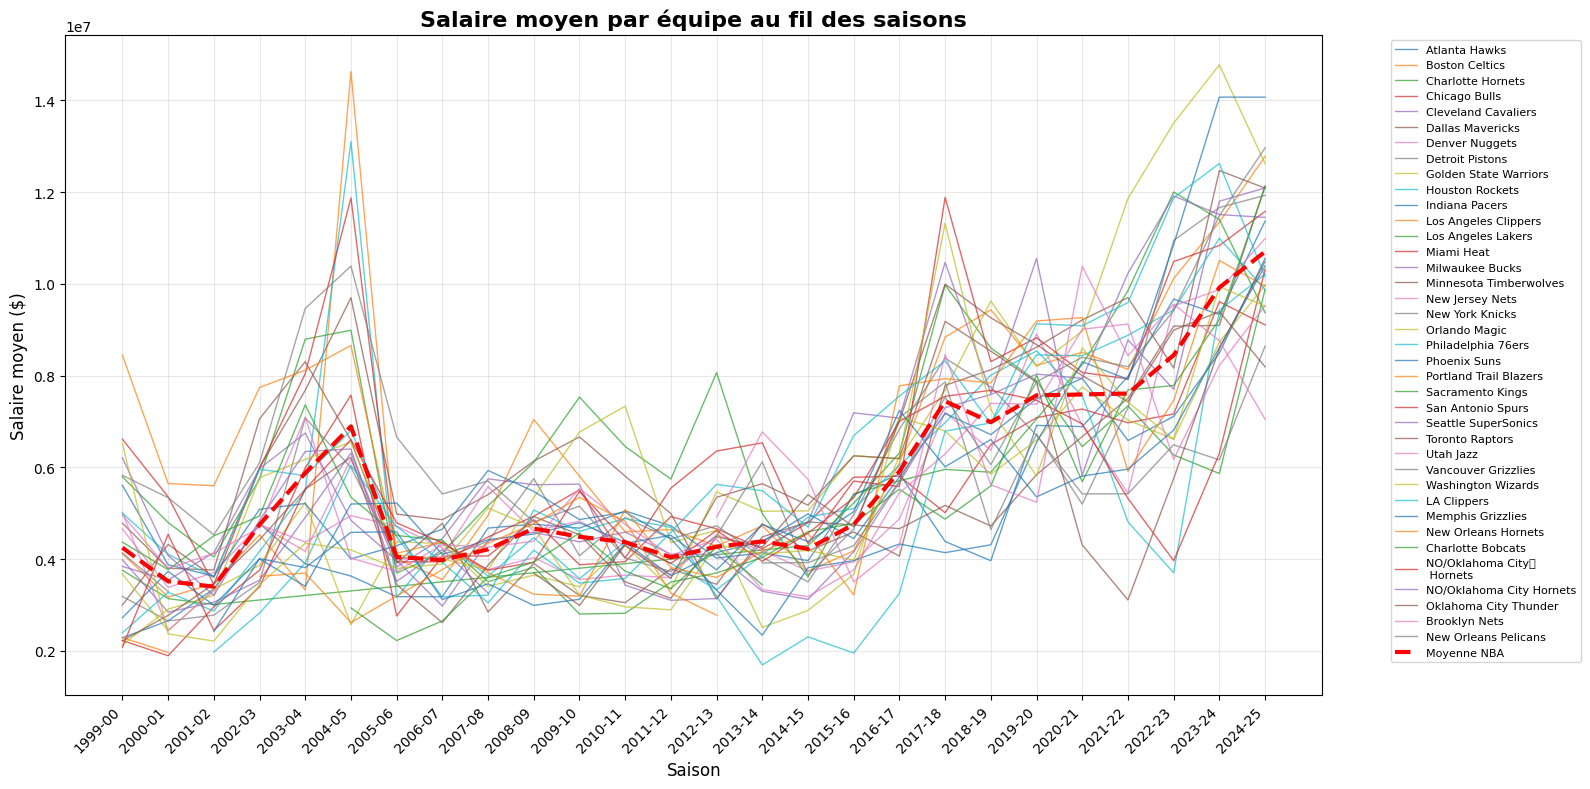

In [20]:
# Calcul du salaire moyen par équipe par an
salary_by_team_year = df.groupby(['Season', 'Team'])['Salary'].mean().reset_index()
salary_by_team_year.columns = ['Season', 'Team', 'Average_Salary']

# Calcul du salaire moyen global par saison (toutes équipes confondues)
salary_avg_global = df.groupby('Season')['Salary'].mean().reset_index()
salary_avg_global.columns = ['Season', 'Average_Salary']

# Création du graphique
plt.figure(figsize=(16, 8))

# Tracer une ligne pour chaque équipe
for team in salary_by_team_year['Team'].unique():
    team_data = salary_by_team_year[salary_by_team_year['Team'] == team]
    plt.plot(team_data['Season'], team_data['Average_Salary'], label=team, alpha=0.7, linewidth=1)

# Tracer la moyenne globale en mise en valeur
plt.plot(salary_avg_global['Season'], salary_avg_global['Average_Salary'], 
         color='red', linewidth=3, label='Moyenne NBA', linestyle='--', zorder=10)

plt.title('Salaire moyen par équipe au fil des saisons', fontsize=16, fontweight='bold')
plt.xlabel('Saison', fontsize=12)
plt.ylabel('Salaire moyen ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Il ne semble pas qu'une équipe reste tout au long de la période parmi les équipes avec le salaire moyen le plus élevé. Sur plusieurs années, cela est possible comme pour les Phoenix Suns depuis le début de la décennie 2020, mais ces derniers n'étaient pas parmi les plus gros offreurs une dizaine d'années auparavant. Cela s'explique par des cycles d'arrivées et de départs de joueurs stars. Dans le cas de Phoenix, ils disposent ces dernières années d'un des meilleurs joueurs offensifs de la ligue en la personne de Devin Booker. Il est alors fortement payé, et les ambitions de la franchise ont été revues à la hausse depuis son arrivée. En conséquence, elle investit sur d'autres joueurs très forts et donc très chers, dans l'objectif de gagner un titre. Cependant cela s'accompagne de taxes très importantes pour avoir enfreint les règles de fair-play financier, et donc, ce n'est pas soutenable à long terme.